<a href="https://colab.research.google.com/github/liege1997/Sign-Language-Recognition/blob/main/silar.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project Silar - Sign Language Recognition

**Initial methods to import dataset from Kaggle**

import os

os.chdir('/content/drive/MyDrive/Colab Notebooks/ProjectSilar')

os.listdir()

!pip install kaggle

!kaggle datasets download -d ayuraj/american-sign-language-dataset

!unzip -q 'american-sign-language-dataset.zip'

**References:**

https://colab.research.google.com/github/xn2333/OpenCV/blob/master/Image_Processing_in_Python_Final.ipynb#scrollTo=6dy-iP-VTibt

https://developers.google.com/machine-learning/practica/image-classification/convolutional-neural-networks

https://www.tensorflow.org/tutorials/load_data/images

In [84]:
import os
import numpy as np
import pandas as pd
import tensorflow as tf
import cv2 
import matplotlib.pyplot as plt
%matplotlib inline

In [49]:
img_folder="/content/drive/MyDrive/Colab Notebooks/ProjectSilar/asl"
asl_dir = tf.keras.preprocessing.image_dataset_from_directory(img_folder)

Found 25291 files belonging to 36 classes.


In [87]:
batch_size = 32
img_height = 200
img_width = 200
load_size = 40 #total images per folder

In [88]:
os.chdir('/content/drive/MyDrive/Colab Notebooks/ProjectSilar/asl')

image_data=[]
class_labels=[]

for folder_name in os.listdir():
  folder_path = os.path.join(os.getcwd(),folder_name)
  for imgs in os.listdir(folder_path)[:load_size]:
    img_path=os.path.join(folder_path,imgs)
    image=cv2.imread(img_path,0) #grayscale
    image=cv2.resize(image,(img_width,img_height))
    image=np.asarray(image)
    image = image.astype('float32')
    image /= 255
    image_data.append(image)
    class_labels.append(folder_name)

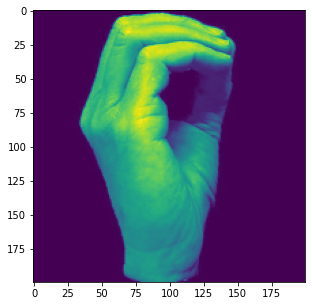

In [91]:
plt.figure(figsize=(10,5))
plt.imshow(image_data[0])

In [60]:
os.path.join(os.getcwd(),"0")

'/content/drive/My Drive/Colab Notebooks/ProjectSilar/asl/0'